In [6]:
import sys
sys.path.append("/cluster/home/yhgong/")

import matplotlib.pyplot as plt
import numpy as np

from python.modules import *
plt.style.use('default')

In [2]:
simPath: str = "/lfs/data/yhgong/productionRun/single/HD/Cooling_Feedback_ContiRandom15"

### Turbulence Heating

In [5]:
result = ProfileAnalyzor() \
    .setInputs(
        profileMode=ProfileMode.TurbulenceHeating,
        simFile=SimFileModel(
            simPath=simPath,
            hdf5FileTitle="perseus_merger",
            hdf5FileMode=Hdf5Mode.PlotFile,
            fileStepMyr=1
        ),
        calculationInfo=TurbulenceHeatingProfileCalculationInfoModel(
            rStartKpc=50,
            rEndKpc=200,
            rStepKpc=25,
            shape=Shape.Box,
            tMyr=1000,
            rhoIndex=0
        )
    ) \
    .getData()

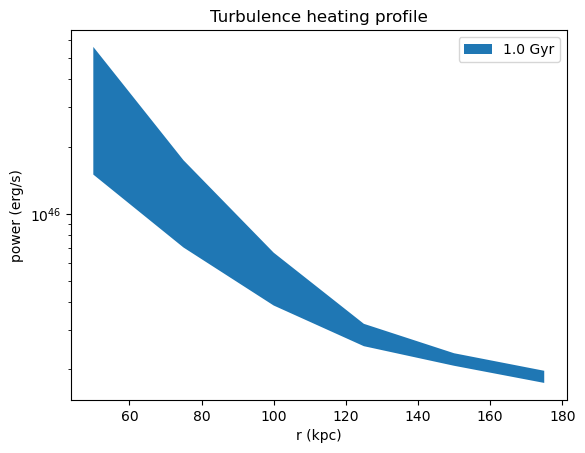

In [6]:
fig, ax = plt.subplots()

ax.fill_between(result.x, result.value.upperLimit, result.value.lowerLimit, \
    label=f"{result.label[0]} {result.label[1]}")
ax.set_title("Turbulence heating profile")
ax.set_xlabel("r (kpc)")
ax.set_ylabel("power (erg/s)")
ax.set_yscale("log")
ax.legend()

### X-ray emissivity

#### Box

In [3]:
result = ProfileAnalyzor() \
    .setInputs(
        profileMode=ProfileMode.GasProperty,
        simFile=SimFileModel(
            simPath=simPath,
            hdf5FileTitle="perseus_merger",
            hdf5FileMode=Hdf5Mode.PlotFile,
            fileStepMyr=1
        ),
        calculationInfo=GasPropertyProfileCalculationInfoModel(
            rStartKpc=50,
            rEndKpc=200,
            rStepKpc=10,
            shape=Shape.Box,
            tMyr=1000,
            gasProperty=GasField.Emissivity
        )
    ) \
    .getData()

yt : [INFO     ] 2024-05-05 17:53:03,428 Particle file found: perseus_merger_hdf5_part_1000
yt : [INFO     ] 2024-05-05 17:53:03,524 Parameters: current_time              = 3.155709646823747e+16
yt : [INFO     ] 2024-05-05 17:53:03,525 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-05-05 17:53:03,527 Parameters: domain_left_edge          = [-1.23424e+25 -1.23424e+25 -1.23424e+25]
yt : [INFO     ] 2024-05-05 17:53:03,529 Parameters: domain_right_edge         = [1.23424e+25 1.23424e+25 1.23424e+25]
yt : [INFO     ] 2024-05-05 17:53:03,530 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2024-05-05 17:53:08,089 Loading emissivity data from ./apec_emissivity_v3.h5
yt : [INFO     ] 2024-05-05 17:53:08,094 X-ray emissivity data calculated with APEC 3.0.9 on 11/19/2019 by John ZuHone.
yt : [INFO     ] 2024-05-05 17:53:08,096 X-ray 'apec' emissivity data version: 3.
yt : [INFO     ] 2024-05-05 17:53:08,138 Adding ('gas','xray_emissivity_0.5_7.0_keV') fiel

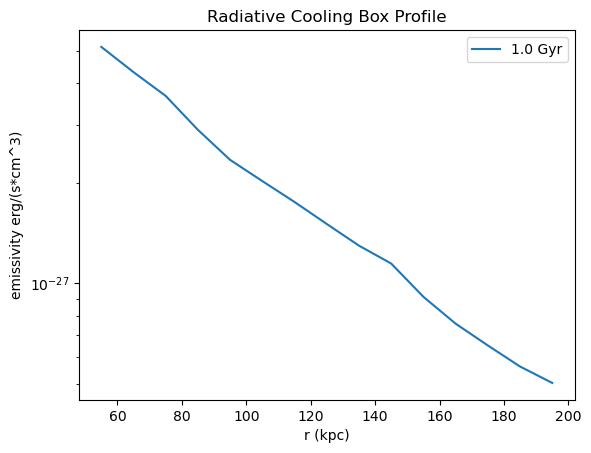

In [4]:
fig, ax = plt.subplots()

ax.plot(result.x, result.value, label=f"{result.label[0]} {result.label[1]}")
ax.set_title("Radiative Cooling Box Profile")
ax.set_xlabel("r (kpc)")
ax.set_ylabel(f"emissivity {result.valueUint}")
ax.set_yscale("log")
ax.legend()

In [8]:
# The radiative cooling rate at r<50 kpc box
result.value[0]*(100*Constants.kpc)**3

1.508068574950637e+44

#### Sphere

In [9]:
result = ProfileAnalyzor() \
    .setInputs(
        profileMode=ProfileMode.GasProperty,
        simFile=SimFileModel(
            simPath=simPath,
            hdf5FileTitle="perseus_merger",
            hdf5FileMode=Hdf5Mode.PlotFile,
            fileStepMyr=1
        ),
        calculationInfo=GasPropertyProfileCalculationInfoModel(
            rStartKpc=50,
            rEndKpc=200,
            rStepKpc=10,
            shape=Shape.Sphere,
            tMyr=1000,
            gasProperty=GasField.Emissivity
        )
    ) \
    .getData()

yt : [INFO     ] 2024-05-05 18:00:21,493 Particle file found: perseus_merger_hdf5_part_1000
yt : [INFO     ] 2024-05-05 18:00:21,580 Parameters: current_time              = 3.155709646823747e+16
yt : [INFO     ] 2024-05-05 18:00:21,581 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-05-05 18:00:21,582 Parameters: domain_left_edge          = [-1.23424e+25 -1.23424e+25 -1.23424e+25]
yt : [INFO     ] 2024-05-05 18:00:21,583 Parameters: domain_right_edge         = [1.23424e+25 1.23424e+25 1.23424e+25]
yt : [INFO     ] 2024-05-05 18:00:21,584 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2024-05-05 18:00:25,944 Loading emissivity data from ./apec_emissivity_v3.h5
yt : [INFO     ] 2024-05-05 18:00:25,949 X-ray emissivity data calculated with APEC 3.0.9 on 11/19/2019 by John ZuHone.
yt : [INFO     ] 2024-05-05 18:00:25,950 X-ray 'apec' emissivity data version: 3.
yt : [INFO     ] 2024-05-05 18:00:25,972 Adding ('gas','xray_emissivity_0.5_7.0_keV') fiel

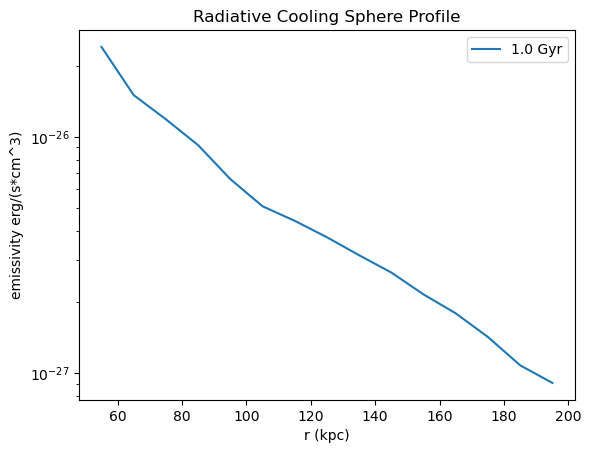

In [10]:
fig, ax = plt.subplots()

ax.plot(result.x, result.value, label=f"{result.label[0]} {result.label[1]}")
ax.set_title("Radiative Cooling Sphere Profile")
ax.set_xlabel("r (kpc)")
ax.set_ylabel(f"emissivity {result.valueUint}")
ax.set_yscale("log")
ax.legend()

In [12]:
# The radiative cooling rate at r<50 kpc sphere
result.value[0]*4/3*(50*Constants.kpc)**3

1.174067269025402e+44

### Temperature

In [13]:
result = ProfileAnalyzor() \
    .setInputs(
        profileMode=ProfileMode.GasProperty,
        simFile=SimFileModel(
            simPath=simPath,
            hdf5FileTitle="perseus_merger",
            hdf5FileMode=Hdf5Mode.PlotFile,
            fileStepMyr=1
        ),
        calculationInfo=GasPropertyProfileCalculationInfoModel(
            rStartKpc=0,
            rEndKpc=1000,
            rStepKpc=10,
            shape=Shape.Sphere,
            tMyr=1000,
            gasProperty=GasField.Temperature
        )
    ) \
    .getData()

yt : [INFO     ] 2024-05-05 18:04:17,146 Particle file found: perseus_merger_hdf5_part_1000
yt : [INFO     ] 2024-05-05 18:04:17,226 Parameters: current_time              = 3.155709646823747e+16
yt : [INFO     ] 2024-05-05 18:04:17,227 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-05-05 18:04:17,228 Parameters: domain_left_edge          = [-1.23424e+25 -1.23424e+25 -1.23424e+25]
yt : [INFO     ] 2024-05-05 18:04:17,229 Parameters: domain_right_edge         = [1.23424e+25 1.23424e+25 1.23424e+25]
yt : [INFO     ] 2024-05-05 18:04:17,230 Parameters: cosmological_simulation   = 0


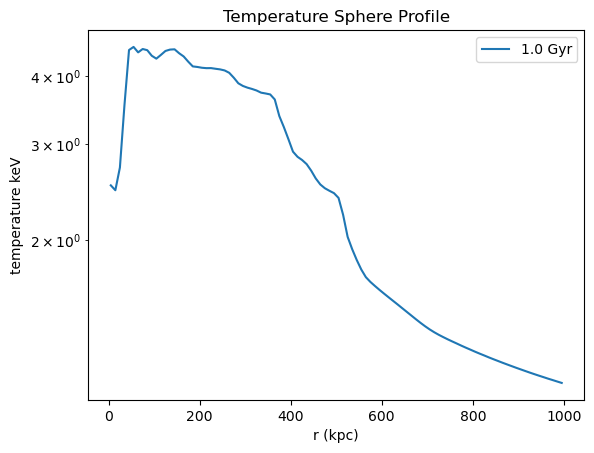

In [14]:
fig, ax = plt.subplots()

ax.plot(result.x, result.value, label=f"{result.label[0]} {result.label[1]}")
ax.set_title("Temperature Sphere Profile")
ax.set_xlabel("r (kpc)")
ax.set_ylabel(f"temperature {result.valueUint}")
ax.set_yscale("log")
ax.legend()